## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [ ]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

SystemError: <class '_frozen_importlib._ModuleLockManager'> returned a result with an error set

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [ ]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [5,10,25]

In [8]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping

results = {}
for patience in PATIENCE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    
    earlystop = EarlyStopping(monitor="valid_acc", 
                          patience=patience, 
                          verbose=1
                          )
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    tag = 'patience_%s' % str(patience)
    results[tag] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}




W0815 13:28:04.345779  6424 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0815 13:28:04.345779  6424 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0815 13:28:04.368779  6424 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 13:28:04.370779  6424 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 13:28:04.376779  6424 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `valid_acc` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 6s 125us/step - loss: 1.7355 - acc: 0.3942 - val_loss: 1.7739 - val_acc: 0.3812
Epoch 3/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.6170 - acc: 0.4336 - val_loss: 1.7019 - val_acc: 0.4100
Epoch 4/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5437 - acc: 0.4599 - val_loss: 1.6364 - val_acc: 0.4247
Epoch 5/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.4891 - acc: 0.4780 - val_loss: 1.5976 - val_acc: 0.4479
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.4434 - acc: 0.4940 - val_loss: 1.5705 - val_acc: 0.4518
Epoch 7/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.4037 - acc: 0.5079 - val_loss: 1.5562 - val_acc: 0.4546
Epoch 8/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3673 - acc: 0.5206 - val_loss: 1.5322 - val_acc: 0.4666
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 145us/step - loss: 2.1972 - acc: 0.2701 - val_loss: 2.0845 - val_acc: 0.3335
Epoch 2/50
 1024/50000 [..............................] - ETA: 6s - loss: 1.8446 - acc: 0.3496

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `valid_acc` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 7s 132us/step - loss: 1.7396 - acc: 0.3943 - val_loss: 1.8508 - val_acc: 0.3771
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6153 - acc: 0.4346 - val_loss: 1.7191 - val_acc: 0.4044
Epoch 4/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5410 - acc: 0.4617 - val_loss: 1.6296 - val_acc: 0.4362
Epoch 5/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.4859 - acc: 0.4822 - val_loss: 1.5996 - val_acc: 0.4400
Epoch 6/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4424 - acc: 0.4966 - val_loss: 1.5764 - val_acc: 0.4437
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4023 - acc: 0.5117 - val_loss: 1.5446 - val_acc: 0.4582
Epoch 8/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.3665 - acc: 0.5257 - val_loss: 1.5369 - val_acc: 0.4596
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 98us/step - loss: 2.2204 - acc: 0.2694 - val_loss: 2.0796 - val_acc: 0.3325
Epoch 2/50
 2048/50000 [>.............................] - ETA: 4s - loss: 1.7975 - acc: 0.3726

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `valid_acc` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 4s 85us/step - loss: 1.7388 - acc: 0.3954 - val_loss: 1.7757 - val_acc: 0.3875
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6146 - acc: 0.4351 - val_loss: 1.6680 - val_acc: 0.4221
Epoch 4/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5417 - acc: 0.4611 - val_loss: 1.6247 - val_acc: 0.4359
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.4877 - acc: 0.4799 - val_loss: 1.5782 - val_acc: 0.4480
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4411 - acc: 0.4966 - val_loss: 1.5659 - val_acc: 0.4504
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4042 - acc: 0.5108 - val_loss: 1.5364 - val_acc: 0.4626
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3680 - acc: 0.5230 - val_loss: 1.5172 - val_acc: 0.4705
Epoch 9/50
50000/50000 [============================

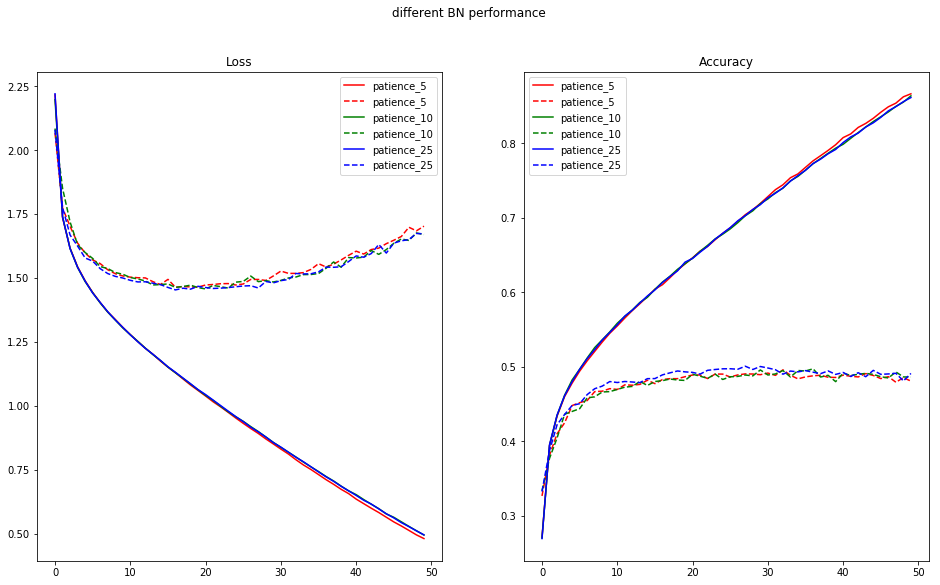

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(16,9))
plt.subplot(121).set_title('Loss')
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend(loc = 'best')

plt.subplot(122).set_title('Accuracy')
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend(loc = 'best')
plt.suptitle('different BN performance')
plt.show()